<a href="https://colab.research.google.com/github/prabindh/covid2020-predictor/blob/master/Prediction_Covid_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction Exercise

Predict the number of cases n-days after from the 1st reported infection.

Use the data available in the below file, provided by JHU CSSE.

https://github.com/prabindh/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv

In [0]:
#import cudf as pd
import pandas as pd

from urllib.request import urlopen
#numbers_csv = urlopen("https://raw.githubusercontent.com/prabindh/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
numbers_csv = urlopen("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
numbers_df = pd.read_csv(numbers_csv)
numbers_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,237,273,281,299,349,367,423,444,484,521
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,259,277,304,333,361,377,383,400,409,416
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,847,986,1171,1251,1320,1423,1468,1572,1666,1761
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,390,428,439,466,501,525,545,564,583,601
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,8,8,8,10,14,16,17,19,19,19


Lets find the details of this dataset.


In [0]:
numbers_df["Country/Region"].describe()

count       264
unique      185
top       China
freq         33
Name: Country/Region, dtype: object

Treating the various provinces, countries as independent features, get only the numeric count for all rows.

In [0]:
count_df = numbers_df.iloc[:, 4:]
count_df.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20
0,0,0,0,0,0,0,0,0,0,0,...,237,273,281,299,349,367,423,444,484,521
1,0,0,0,0,0,0,0,0,0,0,...,259,277,304,333,361,377,383,400,409,416
2,0,0,0,0,0,0,0,0,0,0,...,847,986,1171,1251,1320,1423,1468,1572,1666,1761
3,0,0,0,0,0,0,0,0,0,0,...,390,428,439,466,501,525,545,564,583,601
4,0,0,0,0,0,0,0,0,0,0,...,8,8,8,10,14,16,17,19,19,19


In [0]:
count_df.describe()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20
count,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,...,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000
mean,2.102273,2.477273,3.564394,5.431818,8.022727,11.087121,21.128788,23.356061,31.189394,37.602273,...,3532.594697,3838.886364,4151.200758,4535.636364,4818.617424,5095.079545,5401.878788,5723.878788,6042.992424,6408.026515
std,27.382118,27.480921,34.210982,47.612615,66.537101,89.647535,220.011922,221.352587,305.039177,361.649891,...,17859.555003,19711.027486,21667.237096,23940.073183,25670.348203,27466.891516,29364.316603,31408.470549,33419.461011,35633.968667
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,16.000000,19.000000,20.000000,20.750000,21.750000,24.000000,25.750000,27.750000,29.500000,32.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,165.500000,172.500000,183.000000,189.500000,208.500000,221.000000,232.500000,246.000000,254.500000,256.500000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,779.500000,873.000000,943.000000,980.250000,1019.500000,1049.750000,1128.750000,1189.250000,1233.750000,1269.250000
max,444.000000,444.000000,549.000000,761.000000,1058.000000,1423.000000,3554.000000,3554.000000,4903.000000,5806.000000,...,213372.000000,243762.000000,275586.000000,308853.000000,337072.000000,366667.000000,396223.000000,429052.000000,461437.000000,496535.000000


Get the country with maximum numbers the last day of record.


In [0]:
max_count = count_df.iloc[:, -1].max()
max_count

496535

In [0]:
max_index = count_df['4/2/20'].idxmax()
max_index

225

In [0]:
numbers_df.iloc[max_index]

Province/State        NaN
Country/Region         US
Lat               37.0902
Long             -95.7129
1/22/20                 1
                   ...   
4/6/20             366667
4/7/20             396223
4/8/20             429052
4/9/20             461437
4/10/20            496535
Name: 225, Length: 84, dtype: object

In [0]:
usa_data = numbers_df[numbers_df["Country/Region"] == "US"]
usa_data

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20
225,NaN,US,37.0902,-95.7129,1,1,2,2,5,5,...,213372,243762,275586,308853,337072,366667,396223,429052,461437,496535


In [0]:
china_data = numbers_df[numbers_df["Country/Region"] == "China"]
china_data

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20
49,Anhui,China,31.8257,117.2264,1,9,15,39,60,70,...,990,990,990,990,990,990,990,990,991,991
50,Beijing,China,40.1824,116.4142,14,22,36,41,68,80,...,580,582,584,585,586,587,587,588,588,588
51,Chongqing,China,30.0572,107.8740,6,9,27,57,75,110,...,579,579,579,579,579,579,579,579,579,579
52,Fujian,China,26.0789,117.9874,1,5,10,18,35,59,...,345,345,349,350,350,350,351,351,351,351
53,Gansu,China,37.8099,101.0583,0,2,2,4,7,14,...,138,138,138,138,138,139,139,139,139,139
54,Guangdong,China,23.3417,113.4244,26,32,53,78,111,151,...,1501,1507,1514,1516,1524,1532,1533,1536,1539,1544
55,Guangxi,China,23.8298,108.7881,2,5,23,23,36,46,...,254,254,254,254,254,254,254,254,254,254
56,Guizhou,China,26.8154,106.8748,1,3,3,4,5,7,...,146,146,146,146,146,146,146,146,146,146
57,Hainan,China,19.1959,109.7453,4,5,8,19,22,33,...,168,168,168,168,168,168,168,168,168,168
58,Hebei,China,39.5490,116.1306,1,1,2,8,13,18,...,323,325,326,326,327,327,327,327,327,327


How does India fare ?

In [0]:
india_data = numbers_df[numbers_df["Country/Region"] == "India"]
india_data

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20
131,NaN,India,21.0,78.0,0,0,0,0,0,0,...,1998,2543,2567,3082,3588,4778,5311,5916,6725,7598


## Visualisation of the rates

In [0]:
# Take only the numerical values
counts = india_data.iloc[0:1, range(4, len(india_data.columns))]

startCol = 0
for columnName in counts:
  if counts[columnName].values > 0:
    break
  startCol = startCol + 1
counts = counts.iloc[0:1, range(startCol, len(counts.columns))]

counts

,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,...,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20
131,1,1,1,2,3,3,3,3,3,3,...,1998,2543,2567,3082,3588,4778,5311,5916,6725,7598


## Converting to np array

In [0]:
counts_np = counts.to_numpy()

In [0]:
counts_np.shape

(1, 72)

In [0]:
import numpy as np
counts_np = np.squeeze(counts_np)

In [0]:
import numpy as np
counts_np

array([   1,    1,    1,    2,    3,    3,    3,    3,    3,    3,    3,
          3,    3,    3,    3,    3,    3,    3,    3,    3,    3,    3,
          3,    3,    3,    3,    3,    3,    3,    3,    3,    3,    5,
          5,   28,   30,   31,   34,   39,   43,   56,   62,   73,   82,
        102,  113,  119,  142,  156,  194,  244,  330,  396,  499,  536,
        657,  727,  887,  987, 1024, 1251, 1397, 1998, 2543, 2567, 3082,
       3588, 4778, 5311, 5916, 6725, 7598], dtype=int64)

## Visualisation of the data

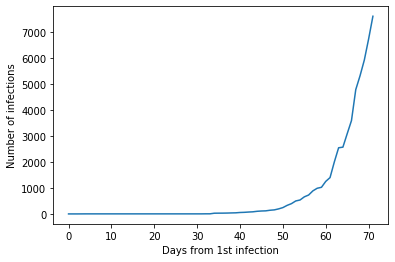

In [0]:
import matplotlib.pyplot as plt
plt.plot(list(range(0,counts_np.shape[0])),counts_np)
plt.xlabel("Days from 1st infection") 
plt.ylabel("Number of infections") 
plt.show()


## Formulate the data-set


In [0]:
x_days = np.array(list(range(0, len(counts_np))))
x_days

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71])

In [0]:
y_infections_india = counts_np
y_infections_india

array([   1,    1,    1,    2,    3,    3,    3,    3,    3,    3,    3,
          3,    3,    3,    3,    3,    3,    3,    3,    3,    3,    3,
          3,    3,    3,    3,    3,    3,    3,    3,    3,    3,    5,
          5,   28,   30,   31,   34,   39,   43,   56,   62,   73,   82,
        102,  113,  119,  142,  156,  194,  244,  330,  396,  499,  536,
        657,  727,  887,  987, 1024, 1251, 1397, 1998, 2543, 2567, 3082,
       3588, 4778, 5311, 5916, 6725, 7598], dtype=int64)

## Obtaining data for any country

Note the changes, to add up all provinces/regions within a country, if found. For example, there are more than one regions in China.

In [0]:
def get_covidian_count(country_name):
  country_data = numbers_df[numbers_df["Country/Region"] == country_name]
  rows = country_data.shape[0]
  counts = country_data.iloc[0:rows, range(4, len(country_data.columns))]
  counts = counts.sum()
  startCol = 0
  for column in counts:
    if column > 0:
      break
    startCol = startCol + 1
  counts = counts.iloc[range(startCol, len(counts))]
  np_arr = np.squeeze(counts.to_numpy())
  x_days = np.array(list(range(0, len(np_arr))))
  return np.array([x_days, np_arr])



In [0]:
infections_usa = get_covidian_count("US")
infections_india = get_covidian_count("India")
infections_china = get_covidian_count("China")
infections_india

array([[   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
          11,   12,   13,   14,   15,   16,   17,   18,   19,   20,   21,
          22,   23,   24,   25,   26,   27,   28,   29,   30,   31,   32,
          33,   34,   35,   36,   37,   38,   39,   40,   41,   42,   43,
          44,   45,   46,   47,   48,   49,   50,   51,   52,   53,   54,
          55,   56,   57,   58,   59,   60,   61,   62,   63,   64,   65,
          66,   67,   68,   69,   70,   71],
       [   1,    1,    1,    2,    3,    3,    3,    3,    3,    3,    3,
           3,    3,    3,    3,    3,    3,    3,    3,    3,    3,    3,
           3,    3,    3,    3,    3,    3,    3,    3,    3,    3,    5,
           5,   28,   30,   31,   34,   39,   43,   56,   62,   73,   82,
         102,  113,  119,  142,  156,  194,  244,  330,  396,  499,  536,
         657,  727,  887,  987, 1024, 1251, 1397, 1998, 2543, 2567, 3082,
        3588, 4778, 5311, 5916, 6725, 7598]], dtype=int64)

In [0]:
np.savetxt("usa.csv",  np.transpose([infections_usa[0],infections_usa[1]]), fmt="%d,%d", header="Days, Count")
np.savetxt("india.csv",  np.transpose([infections_india[0],infections_india[1]]), fmt="%d,%d", header="Days, Count")
np.savetxt("china.csv",  np.transpose([infections_china[0],infections_china[1]]), fmt="%d,%d", header="Days, Count")

To confirm the data is proper, load the data back and check.

In [0]:
test_np = np.loadtxt("usa.csv", delimiter=',', skiprows=1, dtype='int,int')
test_np

array([( 0,      1), ( 1,      1), ( 2,      2), ( 3,      2),
       ( 4,      5), ( 5,      5), ( 6,      5), ( 7,      5),
       ( 8,      5), ( 9,      7), (10,      8), (11,      8),
       (12,     11), (13,     11), (14,     11), (15,     11),
       (16,     11), (17,     11), (18,     11), (19,     11),
       (20,     12), (21,     12), (22,     13), (23,     13),
       (24,     13), (25,     13), (26,     13), (27,     13),
       (28,     13), (29,     13), (30,     15), (31,     15),
       (32,     15), (33,     51), (34,     51), (35,     57),
       (36,     58), (37,     60), (38,     68), (39,     74),
       (40,     98), (41,    118), (42,    149), (43,    217),
       (44,    262), (45,    402), (46,    518), (47,    583),
       (48,    959), (49,   1281), (50,   1663), (51,   2179),
       (52,   2727), (53,   3499), (54,   4632), (55,   6421),
       (56,   7783), (57,  13747), (58,  19273), (59,  25600),
       (60,  33276), (61,  43847), (62,  53740), (63,  

## Given x, predict y

#### Kaggle
Note - this notebook is also available as a Kaggle kernel, at
https://www.kaggle.com/prabindh/kernel5f31471257

#### References
1. https://pypi.org/project/fbprophet

2. https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/
